<a href="https://colab.research.google.com/github/ishamC96/Iowa-Home-Price-Predictions/blob/main/Iowa_Home_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*

In [2]:
'''T1: Import data into DataFrame `df`.'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge


url_train = 'https://drive.google.com/uc?export=download&id=1tmYLQ1RwIgjI_d66PWnlXU-5D_VxtiQc'
df = pd.read_csv(url_train)
def wrangle(filepath):
  df = pd.read_csv(filepath, parse_dates = ['Yr_Sold'] , index_col= ['Yr_Sold'])
  return df
df = wrangle(url_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Sale Price')

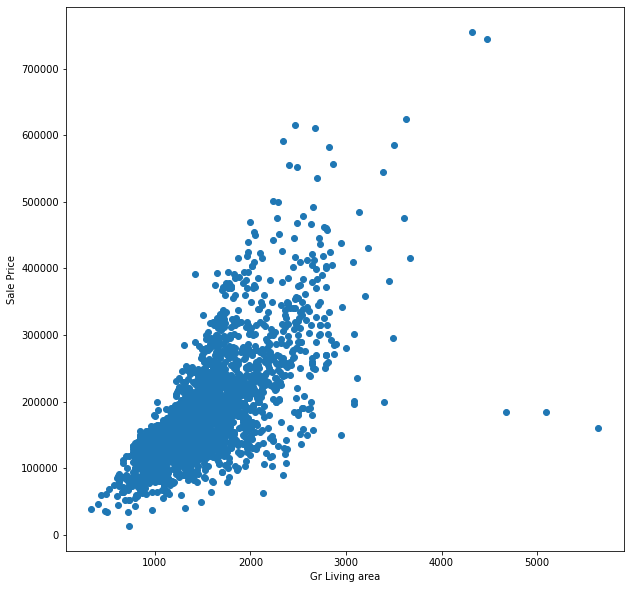

In [3]:
''' Scatter Plot that shows Sale Price as a function of Gr_Liv_Area (Total Square foot)'''

plt.figure(figsize = (10,10))
plt.scatter(df['Gr_Liv_Area'] , df['SalePrice'])
plt.xlabel('Gr Living area')
plt.ylabel('Sale Price')

In [4]:
'''Splitting the data into a target vector, y, and the feature matrix, X'''

target = 'SalePrice'
y = df[target]
X = df.drop(columns = target)

In [5]:
'''Splitting the data on the specified date in 2009'''

cutoff = '2009-01-01'

mask = X.index < cutoff

X_train = X.loc[mask]
y_train = y.loc[mask]

X_val = X.loc[~mask]
y_val= y.loc[~mask]

In [6]:
'''Finding the mean housing price for the training data, then calculating
the Mean Absolute Error for a model that always predicts the mean'''

y_pred = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train,y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 58502.9394639757


In [7]:
'''Building and training a Linear Regression Model'''

model_lr = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    StandardScaler(),
    LinearRegression())

model_lr.fit(X_train, y_train);

In [8]:
'''Building and training a Ridge Regression Model'''

model_r = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    StandardScaler(),
    Ridge(normalize = False))

model_r.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [9]:
'''Comparing metrics between the different models'''

model_lr_training_mae = mean_absolute_error(y_train, model_lr.predict(X_train))
model_lr_validation_mae = mean_absolute_error(y_val, model_lr.predict(X_val))
model_r_training_mae = mean_absolute_error(y_train, model_r.predict(X_train))
model_r_validation_mae = mean_absolute_error(y_val, model_r.predict(X_val))
print('Linear Regression Model')
print('Training MAE:', model_lr_training_mae)
print('Validation MAE:', model_lr_validation_mae)
print()
print('Ridge Regression Model')
print('Training MAE:', model_r_training_mae)
print('Validation MAE:', model_r_validation_mae)

Linear Regression Model
Training MAE: 16252.725113683535
Validation MAE: 1.0835239882409024e+16

Ridge Regression Model
Training MAE: 16119.822691743922
Validation MAE: 17986.919803129713


In [10]:
'''Comparing the models r^2 score'''

model_lr_r2_score = model_lr.score(X_val, y_val)
model_r_r2_score = model_r.score(X_val, y_val)
print('Linear Regression R^2:', model_lr_r2_score)
print('Ridge Regression R^2:', model_r_r2_score)

Linear Regression R^2: -7.639381424191251e+24
Ridge Regression R^2: 0.888738016537792


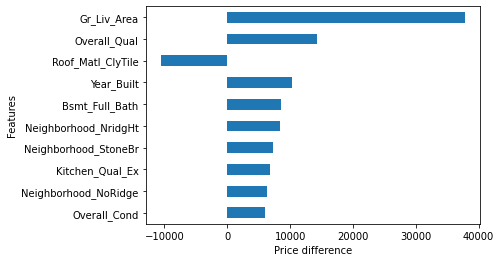

In [11]:
'''Visualizing the top 10 most important features for the model's predictions'''

coefficients = model_r.named_steps['ridge'].coef_
features = model_r.named_steps['onehotencoder'].get_feature_names()
feat_imp = pd.Series(coefficients, index = features).sort_values(key = abs)
feat_imp.tail(10).plot(kind = 'barh')
plt.xlabel('Price difference')
plt.ylabel('Features');